Andrew Marshall 
Assignment 3.1
11/15/2018 
Assignment Objective: Explore NNET models with MLPClassifier

In [1]:
# Built-in/Generic Imports
import os
import sys
#

# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import mglearn.plots
#

# Modules
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
#



Text(0,0.5,'Feature 1')

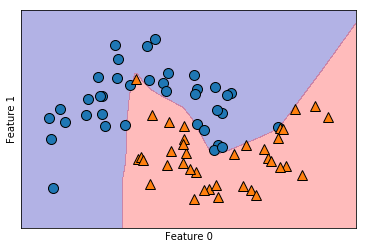

In [2]:
#Model before hidden layer sizes are added, with a high number of hidden units yields a smooth decision boundary.
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0,0.5,'Feature 1')

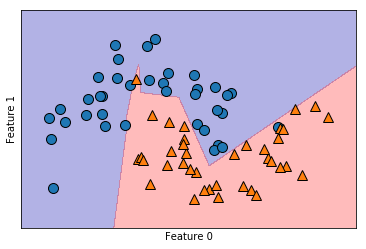

In [3]:
#Model which hidden layer size of 10; A higher number, such as 100, would add more complexity and smoother decision boundary,
#though it would be more beneficial with larger datasets than this one.
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

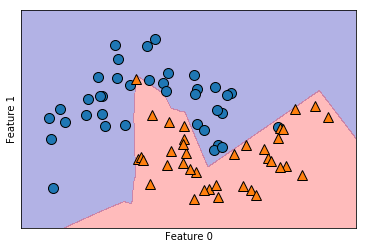

In [4]:
# using two hidden layers, with 10 units each; Adding the additional hidden layer will result in a smooth decision boundary.
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

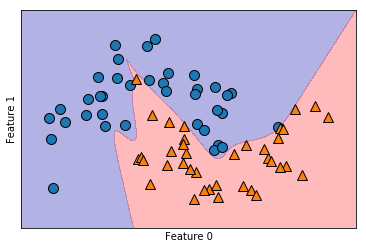

In [5]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity,results in a smoother decision boundary.
# than the previous model which uses nonlinearity 'relu'.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

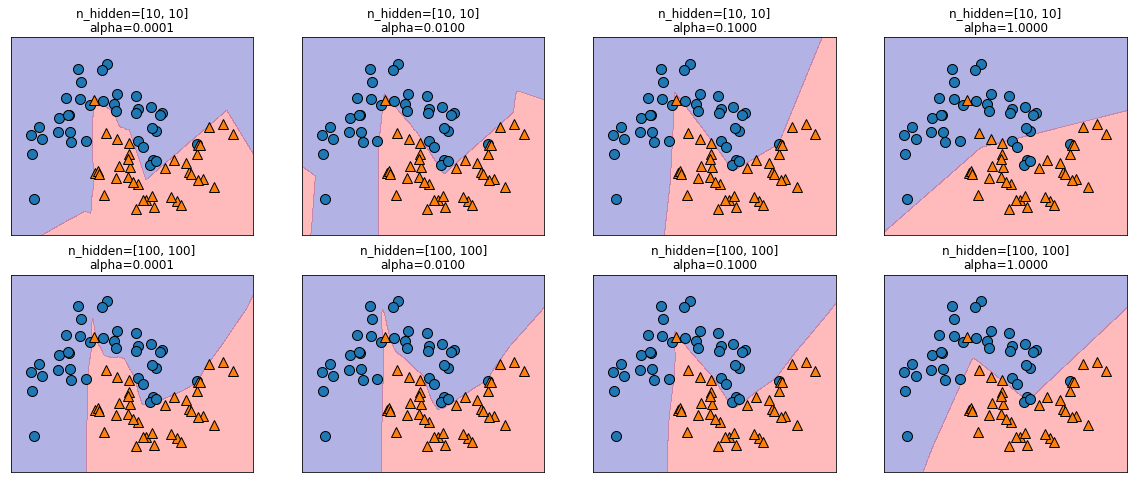

In [6]:
#The models visualized are using a pair of two hidden layers, [10,10] and [100,100], respectively with 4 different alphas.
#Alpha is used to control complexity (i.e. over- and underfitting); increasing alpha yields 
#a less complex and less smooth decision boundary (controls overfitting); decreasing alpha yields a more complex 
# and smoother decision boundary (controls underfitting). 

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                    alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))